<a href="https://colab.research.google.com/github/Mahesh-ch06/AIML_Code-A-Thon/blob/main/DAY_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE-A-THON DAY 16 CHALLENGE


**TODAYS TASK**

PERFORM CNN MODEL USING MNIST DATASET AND FIND THE TEST ACCURACY OF THE MODEL

PERFORM--

1.Import necessary libraries

2.Load and preprocess the MNIST dataset

3.Define the CNN model

4.Compile the model

5.Train the model

6.Evaluate the model

7.Plotting training and validation accuracy and loss

8.Accuracy plot

9.Loss plot

# Step 1: Import necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and preprocess the MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalize the data to [0,1] range

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Reshape the data to include a channel dimension

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Convert labels to one-hot encoding

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Define the CNN model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model

In [10]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 119ms/step - accuracy: 0.7437 - loss: 0.7694 - val_accuracy: 0.9727 - val_loss: 0.0910
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.9541 - loss: 0.1492 - val_accuracy: 0.9818 - val_loss: 0.0599
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9658 - loss: 0.1081 - val_accuracy: 0.9852 - val_loss: 0.0520
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9731 - loss: 0.0852 - val_accuracy: 0.9868 - val_loss: 0.0448
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9778 - loss: 0.0712 - val_accuracy: 0.9876 - val_loss: 0.0407
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9895 - val_loss: 0.0368
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9894 - val_loss: 0.0350
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9856 - loss: 0

# Step 6: Evaluate the model

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9899 - loss: 0.0304
Test Accuracy: 99.16%


# Step 7: Plotting training and validation accuracy and loss

## Accuracy Plot

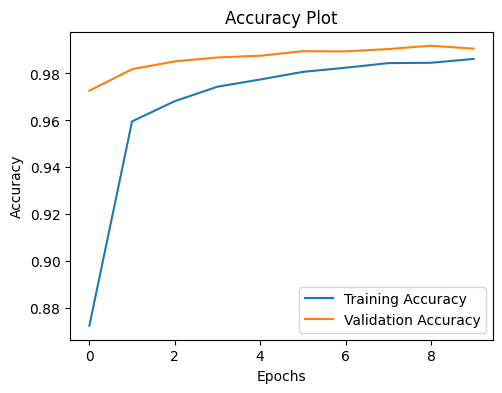

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Loss Plot

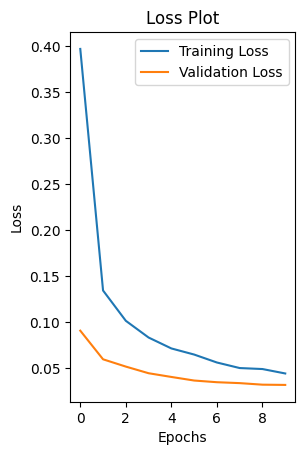

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()